Hola **José**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

### Entrega segunda revisión.

# Revisión estudio A/B para Sandías Brasil.

Durante este trabajo analizaremos una prueba A/B que se ha quedado inconclusa para una tienda en línea internacional.

El objetivo de las pruebas A/B, como en este caso, es comprobar si un cambio dirigido a una población muestra representa una ventaja respecto a una población de control. En este caso específico, se está probando un sistema de recomendaciones mejorado dentro del sitio para confirmar si, dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto, instancias de agregar artículos al carrito de compras y compras . En cada etapa del embudo del proceso, esperamos al menos un aumento del 10% para considerar que este cambio ha sido exitoso.

Como se ha mencionado, la prueba ya se ha llevado a cabo pero no se analizaron los resultados. El objetivo de este trabajo será validar los datos y concluir el éxito de esta.

Para validar la prueba A/B que se ha llevado a cabo, se nos han compartido los siguientes datos en archivos tipo CSV:
1) `ab_project_marketing_events_us.csv`: el calendario de eventos de marketing para 2020.
2) `final_ab_new_users_upd_us.csv`: todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020.
3) `final_ab_events_upd_us.csv`: todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021.
4) `final_ab_participants_upd_us.csv`: tabla con los datos de los participantes de la prueba.

## Objetivo del estudio.

De acuerdo con lo que se nos ha brindado de información preliminar, el objetivo del estudio será analizar los datos recolectados para una prueba A/B de un sitio de tienda en línea; validar si el estudio se ha llevado a cabo de una forma correcta y cuáles son los resultados que podemos obtener con la información recibida (independientemente de si esta es suficiente).

## Exploración de los datos.

Iniciaremos explorando la información recibida para:
1) Conocer la estructura y contenido de los datos.
2) Realizar cambios cuando corresponda, eliminar duplicados, trabajar valores ausentes.
3) Conocer el embudo del proceso de compra dentro del sitio.
4) Obtener estadísticas en base a la información.

Buscaremos resolver lo siguiente:

- ¿Es necesario convertir los tipos?
- ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?
- Lleva a cabo el análisis exploratorio de datos:
    - Estudia la conversión en las diferentes etapas del embudo.
    - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

Iniciamos importando las librerías con las que trabajaremos nuestro código; posteriormente, importaremos los datos en DataFrames de Pandas para poder trabajar con ellas.

In [1]:
# Importamos las librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth

In [2]:
# Importamos los datos como DF:
df_cal_event = pd.read_csv('ab_project_marketing_events_us.csv')
df_reg_tda = pd.read_csv('final_ab_new_users_upd_us.csv')
df_act = pd.read_csv('final_ab_events_upd_us.csv')
df_part_prueba = pd.read_csv('final_ab_participants_upd_us.csv')

### Calendario de eventos:

Iniciamos con el primer DF importado. Presentaremos una previsualización de la tabla para familiarizarnos con la misma, después veremos cuantos datos nulos (o faltantes) tenemos y el tipo de datos por columna, buscaremos duplicados y realizaremos correcciones pertinentes; por último, obtenedremos algunas estadísticas básicas.

In [3]:
# Presentamos los primeros registros del df_cal_event:
df_cal_event.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
# Aplicamos el método info() para ver el tipo de datos y la cantidad de registros:
df_cal_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


El único cambio relevante en esta etapa será convertir a formato de fecha las fechas de inicio y fin de cada evento. Dividiremos la columna de regions en una columna binaria por región donde 1 representará que el evento se lleva a cabo en la región y 0 que no.

In [5]:
# Convertimos start_dt y finish_dt a tipo de datos datetime:
df_cal_event['start_dt'] = pd.to_datetime(df_cal_event['start_dt'],format="%Y-%m-%d")
df_cal_event['finish_dt'] = pd.to_datetime(df_cal_event['finish_dt'],format="%Y-%m-%d")

In [6]:
# Validamos el cambio:
print("Tipo de dato para start_dt:",df_cal_event['start_dt'].dtype)
print("\n")
print("Tipo de dato para finish_dt:",df_cal_event['finish_dt'].dtype)

Tipo de dato para start_dt: datetime64[ns]


Tipo de dato para finish_dt: datetime64[ns]


In [7]:
# Obtenemos el nombre de todas las regiones:
regiones = []

for i, row in df_cal_event.iterrows():
    aux = row['regions'].split(",")
    for j in aux:
        j = j.strip()
        if j not in regiones:
            regiones.append(j)

print(regiones)

['EU', 'N.America', 'CIS', 'APAC']


Vemos que hay un par de errores de dedo en las regiones CIS y APAC al duplicarse con una coma, por lo cual corregimos:

In [8]:
# Creamos las columnas binarias para cada región:
for i, row in df_cal_event.iterrows():
    lista_reg = row['regions'].split(",")
    for reg_l in lista_reg:
        reg = reg_l.strip()
        if reg in regiones:
            df_cal_event.loc[i,reg] = 1
        else:
            df_cal_event.loc[i,reg] = 0
        
# Sustituimos los NaN:
for reg in regiones:
    df_cal_event[reg].fillna(0,inplace=True)


# Validamos la creación de las columnas binarias:
df_cal_event.head()

,name,regions,start_dt,finish_dt,EU,N.America,CIS,APAC
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,1.0,1.0,0.0,0.0
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,1.0,1.0,1.0,1.0
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,1.0,1.0,0.0,0.0
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,1.0,1.0,1.0,1.0
4,4th of July Promo,N.America,2020-07-04,2020-07-11,0.0,1.0,0.0,0.0


In [9]:
# Obtenemos cuantos eventos se dan por región:
for reg in regiones:
    print(f"Eventos en {reg}: {df_cal_event[reg].sum()}")

Eventos en EU: 7.0
Eventos en N.America: 6.0
Eventos en CIS: 7.0
Eventos en APAC: 9.0


In [10]:
# Validamos si hay duplicados:
print("Cantidad de duplicados:",df_cal_event.duplicated().sum())

Cantidad de duplicados: 0


### Participantes registrados:

Realizamos la revisión, correcciones y adiciones y obtención de datos preliminares.

In [11]:
# Presentamos previsualización del DF:
df_part_prueba.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


Revisamos a mayor profundidad la columna ab_test.

In [12]:
# Revisamos las opciones en la columna ab_test:
print(df_part_prueba["ab_test"].value_counts())

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64


In [13]:
# Revisamos las opciones en la columna ab_test:
print(df_part_prueba["group"].value_counts())

A    8214
B    6311
Name: group, dtype: int64


Vemos que se realizaron dos pruebas y que la mayoría de la gente está en la prueba interface_eu_test, sin embargo, la que nos interesa es recommender_system_test y no alcanza a los 6000 usuarios deseados.

In [14]:
# Aplicamos el método info():
df_part_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


No tenemos correcciones por hacer.

In [15]:
# Contamos el total de usuarios únicos para validar que no se haya duplicado un usuario en más de una prueba o grupo:
print("Usuarios únicos:",df_part_prueba['user_id'].nunique())

print("Usuarios duplicados:",df_part_prueba['user_id'].duplicated().sum())

print("Usuarios en dos pruebas:",df_part_prueba[['user_id',"ab_test"]].duplicated().sum())

print("Usuarios en dos grupos:",df_part_prueba[['user_id',"group"]].duplicated().sum())

Usuarios únicos: 13638
Usuarios duplicados: 887
Usuarios en dos pruebas: 0
Usuarios en dos grupos: 446


Quitamos todos los registros de los usuarios duplicados pues no tenemos la certeza de cual es el que es "correcto" mantener.

In [16]:
# Eliminamos los usuarios que están duplicados:
df_part_prueba.drop_duplicates(subset=["user_id"],inplace=True,keep=False)

Tenemos cerca de 1000 usuarios repetidos que hay que eliminar para evitar tener errores de duplicidad.

In [17]:
# Contabilizamos cuantos usuarios de cada grupo están por prueba:
df_usu_prueba = pd.pivot_table(df_part_prueba,index="ab_test",
                               columns="group", aggfunc="count")

df_usu_prueba

user_id      
group                         A     B
ab_test                              
interface_eu_test          5011  4952
recommender_system_test    2082   706

Parece que los grupos A y B para la prueba de interés recommender están muy desproporcionados, costará más trabajo sacar conclusiones válidas.

In [18]:
# Buscamos duplicados:
print("Registros duplicados:", df_part_prueba.duplicated().sum())

Registros duplicados: 0


### Registros en la tienda:

Procedemos con el análisis de este DF.

In [19]:
# Previsualizamos la información:
df_reg_tda.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [20]:
# Aplicamos el método info() para ver datos ausentes y tipo de datos:
df_reg_tda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


Solo requeriremos cambiar el tipo de dato de first_date para que quede como fecha.

In [21]:
# Cambiamos el tipo de dato para fist_date:
df_reg_tda["first_date"] = pd.to_datetime(df_reg_tda["first_date"], format="%Y-%m-%d")

In [22]:
# Validamos el cambio de tipo de dato:
print("Tipo de dato para first_date:", df_reg_tda["first_date"].dtype)

Tipo de dato para first_date: datetime64[ns]


Podemos observar como es que tenemos 4 veces más participantes que se registraron que participantes asignados a las pruebas. Por otro lado, dentro de lo esperado para la prueba, se nos había comentado que se esperaba que el número de participantes de la prueba de interés (recommender) fuera de 6000 y a penas se tienen cerca de 3700 distribuidos en una proporción 3:1 entre los grupos A y B, respectivamente.

Habiendo tantos usuarios registrados pero tan pocos puestos para la prueba de interés, claramente se demuestra un error en el proceso de realizar la prueba.

In [23]:
# Revisamos si hay registros duplicados:
print("Registros en tienda (en línea) duplicados:", df_reg_tda.duplicated().sum())

Registros en tienda (en línea) duplicados: 0


In [24]:
# Revisamos cuantos usuarios únicos están registrados:
print("Usuarios únicos:",df_reg_tda['user_id'].nunique())

Usuarios únicos: 58703


Tenemos muchos más usuarios registrados en la tienda en línea que usuarios de los que tenemos información.

### Actividad de los usuarios:

Por último, revisaremos el dataframe donde almacenamos la actividad en la tienda de los usuarios, de aquí también nos interesa mucho el comprender el embudo y obtener los porcentajes de retención.

In [25]:
# Previsualizamos el dataframe:
df_act.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [26]:
# Aplicamos el método info():
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114470 entries, 0 to 114469
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     114470 non-null  object 
 1   event_dt    114470 non-null  object 
 2   event_name  114470 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


Cambiaremos el tipo de dato de event_dt a una fecha y hora.

In [27]:
# Cambiamos el tipo de dato:
df_act["event_dt"] = pd.to_datetime(df_act["event_dt"],format="%Y-%m-%d %H:%M:%S")

# Validamos el cambio:
print("Tipo de dato para event_dt:",df_act["event_dt"].dtype)

Tipo de dato para event_dt: datetime64[ns]


Validamos la razón de que la columna details tenga tantos valores ausentes con la suposición de que se debe a que los eventos que no sean una compra (purchase) serán los que registren en details un valor ausente.

In [28]:
# Contamos los eventos de purchase que no tienen valor en details:
print("Compras sin detalle:",df_act[df_act['event_name']=="purchase"]["details"].isna().sum())

Compras sin detalle: 0


Confirmamos nuestra suposición, no vale la pena reemplazar los datos ausentes con 0 ya que puede ser engañoso.

Ahora buscaremos comprender el embudo del proceso.

In [29]:
# Obtenemos todos los posibles nombres de eventos que son los pasos de embudo del proceso:
print("Pasos del proceso:", df_act["event_name"].unique())

Pasos del proceso: ['purchase' 'product_cart']


Parece que solo hay dos pasos: poner un producto en el carrito y realizar la compra. Esta forma de identificar los pasos del proceso de compras es muy limitada y no nos bridará suficiente información sobre el proceso global y el impacto en el cambio al sitio con la prueba recommender.

In [30]:
# Revisamos si hay registros duplicados:
print("Registros de actividad duplicados:", df_act.duplicated().sum())

Registros de actividad duplicados: 0


Al ver que no tenemos registros de actividad duplicados, se procede a calcular cuántos registros tenemos para cada etapa del embudo y calcular el porcentaje de retención entre ambos pasos.

In [31]:
# Calculamos la cantidad de eventos por etapa del embudo:
df_event = df_act.groupby("event_name")["user_id"].count().reset_index()

df_event

,event_name,user_id
0,product_cart,54156
1,purchase,60314


No es necesario calcular la retención pues vemos que hay más registros de compras que de artículos puestos en el carrito, lo cual es incongruente y un claro error.

<div class="alert alert-block alert-info">
<b>Aquí se hace mención sobre los pasos del embudo. No se consideró necesario abundar más en el tema puesto que la retención es superior al 100% (lo cual no tiene sentido práctico y debe de ser un error en los datos); por lo mismo no se puede considerar que estos eventos estén correctamente registrados; sin embargo, debido a la observación, se hará un análisis más detallado en la sección de "Análisis de las operaciones en el tiempo."</b> <a class=“tocSkip”></a>
</div>

In [32]:
# Revisamos cuantos usuarios únicos hay:
print("Usuarios únicos:",df_act['user_id'].nunique())

Usuarios únicos: 32452


## Conclusiones preliminares.

La división de usuarios entre las dos pruebas que se realizaron fue muy desequilibrada y poco útil en términos de analizar la prueba del nuevo "recommender" (que es la que interesa en este estudio); así mismo, para la prueba "recommender" la partición de los grupos A (control) y B (prueba) ha sido muy dispar.

Practicamente la totalidad de la prueba se llevó a cabo dentro del marco de la promoción (evento) por la temporada Navideña; esto representa un gran problema puesto que:
1) No conocemos los beneficios que se ofrecen a los clientes en esta promoción.
2) Nos pone en un contexto en el que hay una "segunda variable" por analizar, siendo que hay 6 días que no están dentro del marco de la promoción.

Tenemos más de 58 mil usuarios registrados en la tienda en el periodo del 7 hasta el 21 de diciembre de 2020; sin embargo, solo 32,452 tuvieron actividad durante el periodo de la prueba (7 de diciembre de 2020 y el 1 de enero de 2021); hasta aquí no habría problema, sin embargo, solo tenemos cerca de 2700 usuarios registrados en la prueba "recommender", por lo que no estamos aprovechando toda la información disponible.

## Procedimiento a seguir.

Tomando en cuenta las observaciones y conclusiones preliminares expuestas antes, los pasos que se seguirán para validar los resultados de la prueba A/B para "recommender" serán:
1) Filtrar los DF de registro de usuarios en la tienda (df_reg_tda) y registro de los eventos (df_act) para solo conservar los usuarios que están registrados para la prueba "recommender".
2) Obtener valores estadísticos para nuestros grupos (promedio de acciones registradas dentro de la tienda, promedio comprado).
3) Realizar una prueba Z para comparar ambos grupos de la prueba A/B.

Para no perder más información, consideraremos que las etapas de la compra (puesta de artículos en carrito y compra) están disasociadas, es decir, se puede realizar una compra sin tener que pasar por el carrito.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

## Evaluación de la prueba A/B.

Relizaremos los pasos descritos en la sección anterior.

Buscaremos resolver lo siguiente:
- ¿Qué puedes decir sobre los resultados de la prueba A/B?
- Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones

In [33]:
# Filtramos los DF de registros en tienda y actividad para conservar solo a los usuarios de la prueba "recommender":
df_usu_recom = df_part_prueba[df_part_prueba['ab_test']=="recommender_system_test"]

df_reg_tda_recom = df_reg_tda[df_reg_tda["user_id"].isin(df_usu_recom["user_id"].values)]

# Validamos el filtrado:
print("Registro de usuarios en tienda:")
print("Registros originales:",df_reg_tda.shape)
print("Registros filtrados:",df_reg_tda_recom.shape)
print("\n")

df_act_recom = df_act[df_act["user_id"].isin(df_usu_recom["user_id"].values)]

# Validamos el filtrado:
print("Actividad en la tienda:")
print("Registros originales:",df_act.shape)
print("Registros filtrados:",df_act_recom.shape)

Registro de usuarios en tienda:
Registros originales: (58703, 4)
Registros filtrados: (2788, 4)


Actividad en la tienda:
Registros originales: (114470, 4)
Registros filtrados: (4629, 4)


In [34]:
df_act_recom.head()

,user_id,event_dt,event_name,details
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99
118,A9908F62C41613A8,2020-12-07 11:26:47,purchase,9.99


In [35]:
# Crearemos columnas binarias para contar cuantos eventos son compras y cuantos son puestas de producto en carrito:
for i, row in df_act_recom.iterrows():
    actividad = row["event_name"]
    if actividad == "purchase":
        df_act_recom.loc[i,"purchase"] = 1
        df_act_recom.loc[i,"product_cart"] = 0
    elif actividad == "product_cart":
        df_act_recom.loc[i,"purchase"] = 0
        df_act_recom.loc[i,"product_cart"] = 1

df_act_recom.head()

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\2569812739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act_recom.loc[i,"purchase"] = 1
C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\2569812739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act_recom.loc[i,"product_cart"] = 0


,user_id,event_dt,event_name,details,purchase,product_cart
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,1.0,0.0
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,1.0,0.0
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,1.0,0.0
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,1.0,0.0
118,A9908F62C41613A8,2020-12-07 11:26:47,purchase,9.99,1.0,0.0


In [36]:
# Obtenemos algunos datos de la actividad de los clientes:
df_act_recom_usu = df_act_recom.groupby(["user_id"]).agg({"event_dt":"count","purchase":"sum","product_cart":"sum","details":"sum"}).reset_index()

# Obtenemos el promedio comprado:
df_act_recom_usu["prom_compra"] = df_act_recom_usu["details"] / df_act_recom_usu["purchase"]
df_act_recom_usu["prom_compra"].fillna(0,inplace=True)

df_act_recom_usu.head()

,user_id,event_dt,purchase,product_cart,details,prom_compra
0,0010A1C096941592,4,4.0,0.0,24.96,6.240000
1,003DF44D7589BBD4,4,0.0,4.0,0.00,0.000000
2,005E096DBD379BCF,2,2.0,0.0,104.98,52.490000
3,00C1F5175586DFCF,3,3.0,0.0,19.97,6.656667
4,01157AAD4401952B,2,2.0,0.0,999.98,499.990000


In [37]:
# Usamos el método describe para obtener algunas estadísticas:
df_act_recom_usu.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
event_dt,1404.0,3.30,1.78,1.0,2.0,3.00,4.00,14.00
purchase,1404.0,1.70,1.65,0.0,0.0,2.00,3.00,7.00
product_cart,1404.0,1.59,1.61,0.0,0.0,2.00,3.00,8.00
details,1404.0,38.87,95.95,0.0,0.0,9.98,19.97,999.98
prom_compra,1404.0,15.00,44.41,0.0,0.0,4.99,6.99,499.99


In [38]:
# Agregamos a qué grupo, región y dispositivo pertenece cada usuario:
df_act_recom_usu = df_act_recom_usu.merge(df_part_prueba,how="inner",left_on="user_id",right_on="user_id")

df_act_recom_usu.head()

,user_id,event_dt,purchase,product_cart,details,prom_compra,group,ab_test
0,0010A1C096941592,4,4.0,0.0,24.96,6.240000,A,recommender_system_test
1,003DF44D7589BBD4,4,0.0,4.0,0.00,0.000000,A,recommender_system_test
2,005E096DBD379BCF,2,2.0,0.0,104.98,52.490000,B,recommender_system_test
3,00C1F5175586DFCF,3,3.0,0.0,19.97,6.656667,A,recommender_system_test
4,01157AAD4401952B,2,2.0,0.0,999.98,499.990000,A,recommender_system_test


In [39]:
# Unimos ahora con la región y dispositivo:
df_act_recom_usu = df_act_recom_usu.merge(df_reg_tda_recom[["user_id","region","device"]],how="inner",left_on="user_id",right_on="user_id")

df_act_recom_usu.head()

,user_id,event_dt,purchase,product_cart,details,prom_compra,group,ab_test,region,device
0,0010A1C096941592,4,4.0,0.0,24.96,6.240000,A,recommender_system_test,EU,Android
1,003DF44D7589BBD4,4,0.0,4.0,0.00,0.000000,A,recommender_system_test,EU,Android
2,005E096DBD379BCF,2,2.0,0.0,104.98,52.490000,B,recommender_system_test,EU,Android
3,00C1F5175586DFCF,3,3.0,0.0,19.97,6.656667,A,recommender_system_test,EU,Android
4,01157AAD4401952B,2,2.0,0.0,999.98,499.990000,A,recommender_system_test,EU,iPhone


### Gráficas de distribución:

Usaremos los promedios de los valores puesto que el grupo A es casi 3 veces mayor que el grupo B.

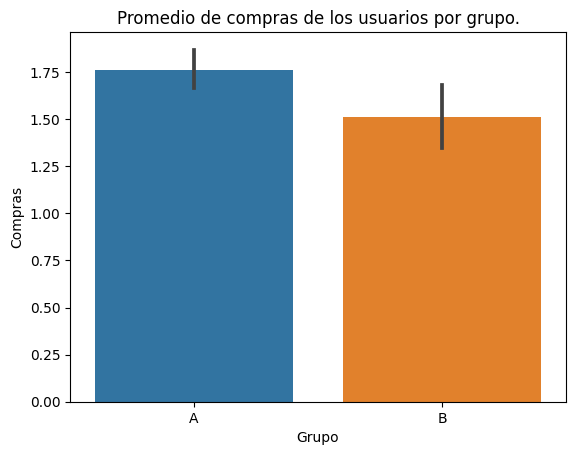

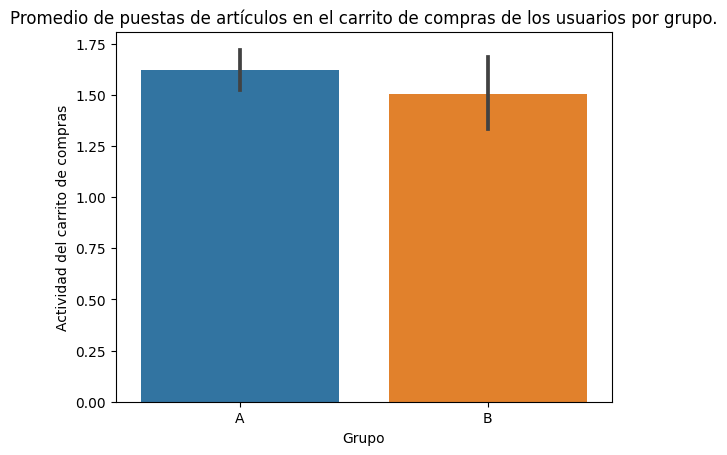

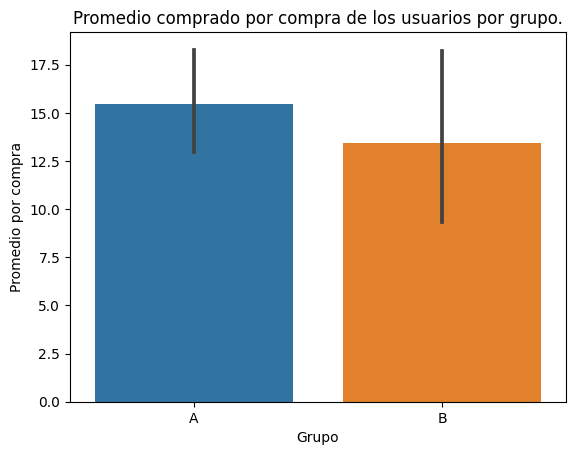

In [40]:
# Graficamos para comparar la cantidad de compras y puestas de artículos en carrito para cada grupo:
sns.barplot(data=df_act_recom_usu,x="group",y="purchase").set(title='Promedio de compras de los usuarios por grupo.',
                                                xlabel='Grupo', ylabel='Compras')

plt.show()

sns.barplot(data=df_act_recom_usu,x="group",y="product_cart").set(title='Promedio de puestas de artículos en el carrito de compras de los usuarios por grupo.',
                                                xlabel='Grupo', ylabel='Actividad del carrito de compras')

plt.show()

# Graficamos el promedio comprado por compra:
sns.barplot(data=df_act_recom_usu,x="group",y="prom_compra").set(title='Promedio comprado por compra de los usuarios por grupo.',
                                                xlabel='Grupo', ylabel='Promedio por compra')

plt.show()

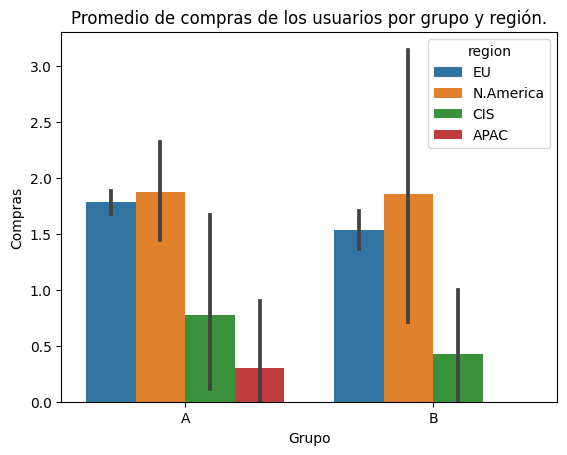

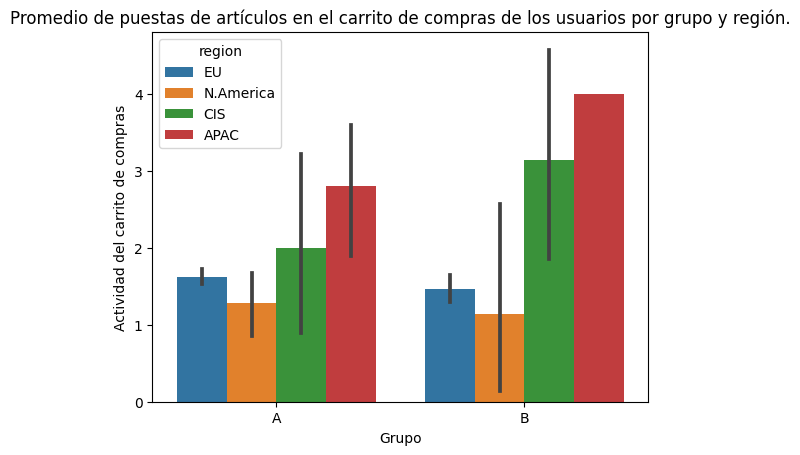

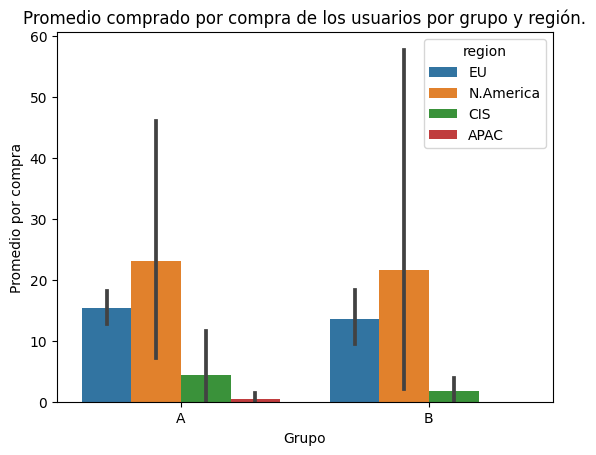

In [41]:
# Graficamos para comparar la cantidad de compras y puestas de artículos en carrito para cada grupo:
sns.barplot(data=df_act_recom_usu,x="group",y="purchase",
           hue = 'region').set(title='Promedio de compras de los usuarios por grupo y región.',
                                                xlabel='Grupo', ylabel='Compras')

plt.show()

sns.barplot(data=df_act_recom_usu,x="group",y="product_cart",
           hue = 'region').set(title='Promedio de puestas de artículos en el carrito de compras de los usuarios por grupo y región.',
                                                xlabel='Grupo', ylabel='Actividad del carrito de compras')

plt.show()

# Graficamos el promedio comprado por compra:
sns.barplot(data=df_act_recom_usu,x="group",y="prom_compra",
           hue = 'region').set(title='Promedio comprado por compra de los usuarios por grupo y región.',
                                                xlabel='Grupo', ylabel='Promedio por compra')

plt.show()

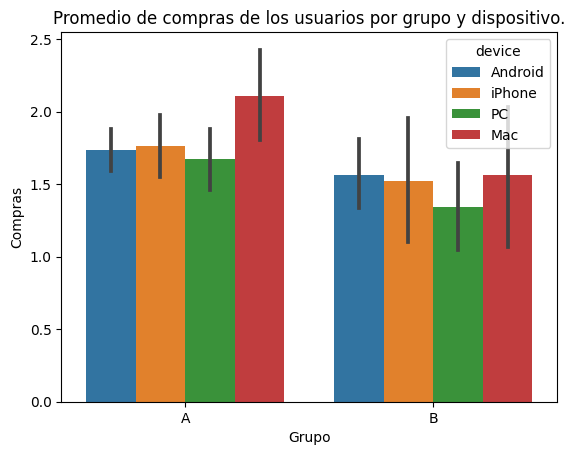

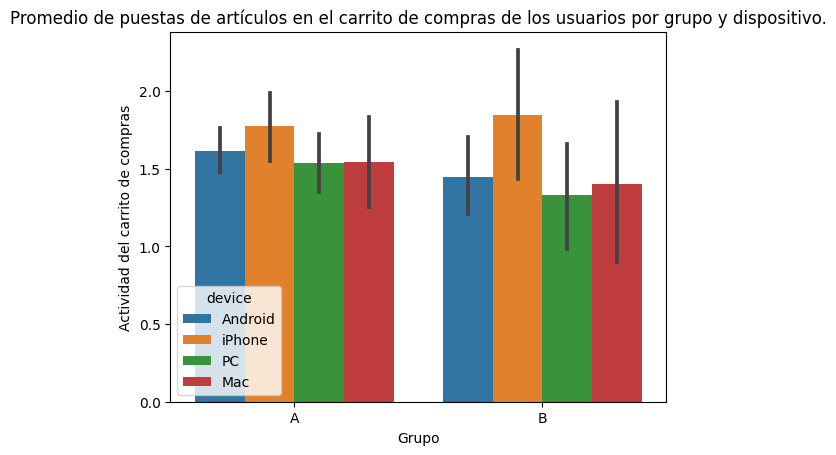

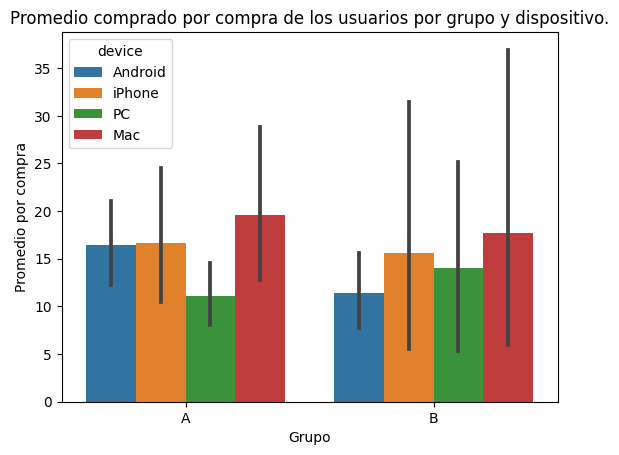

In [42]:
# Graficamos para comparar la cantidad de compras y puestas de artículos en carrito para cada grupo:
sns.barplot(data=df_act_recom_usu,x="group",y="purchase",
           hue = 'device').set(title='Promedio de compras de los usuarios por grupo y dispositivo.',
                                                xlabel='Grupo', ylabel='Compras')

plt.show()

sns.barplot(data=df_act_recom_usu,x="group",y="product_cart",
           hue = 'device').set(title='Promedio de puestas de artículos en el carrito de compras de los usuarios por grupo y dispositivo.',
                                                xlabel='Grupo', ylabel='Actividad del carrito de compras')

plt.show()

# Graficamos el promedio comprado por compra:
sns.barplot(data=df_act_recom_usu,x="group",y="prom_compra",
           hue = 'device').set(title='Promedio comprado por compra de los usuarios por grupo y dispositivo.',
                                                xlabel='Grupo', ylabel='Promedio por compra')

plt.show()

***Nota: En mi versión de Python y Jupyter que corro en Visual Code Studio de escritorio requería escribir "estimator="mean",errorbar=none" para que los gráficos mostraran el promedio de las columnas (y) y no se dibujara la línea sobre cada columna, en esta versión de Jupyter causa falla y por eso se quitó esa parte de código.***

Con estos gráficos simples podemos ver que el grupo A tuvo mejores resultados para la tienda en línea puesto que interactúo más (en promedio por usuario) y gastó más en cada compra (en promedio por usuario).

En cuanto a la división por regiones, en general ambos grupos se comportaron de forma similar, con la notable excepción que los usuarios de Asia y el Pacífico (APAC) no realizaron compras.

Por otro lado, la gran mayoría de compras se realizaron en NA y EU, pero la APAC y CIS pusieron más artículos en su carrito. Esto puede deberse a que en NA y EU existió una promoción Navideña a lo largo del estudio. Considero que esto genera ruido relevante para comparar los grupos como enteros y para la validación de la poblaciones de los grupos A y B también se realizará la prueba con solo las regiones de NA y EU.

En cuanto a el uso de dispositivos, también se encuentra muy homogéneo entre los grupos A y B y entre los mismos dispositivos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hasta este punto está muy bien la exploración de los datos, pero, hace falta la parte de la conversión del embudo donde se muestre cual es la conversión respecto al primero evento en el embudo y también hace falta el análisis de cómo se distribuyen los eventos a lo largo de los días
</div>

### Análisis de las operaciones en el tiempo:

En esta sección se analizará cómo han sido las operaciones de los usuarios a lo largo de los días de la prueba, evaluando tanto cantidad de eventos como el importe comprado.

La información se presentará mediante gráficos en los que se distinga entre las regiones y dispositivos y grupos.

In [43]:
# Obtenemos solo los usuarios de recommender:
df_part_prueba_recom = df_part_prueba[df_part_prueba['ab_test']=="recommender_system_test"]

df_part_prueba_recom.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test


In [44]:
# Ligamos el df de actividad con el de participantes para obtener el grupo:
df_act_recom_des = df_act_recom[['user_id','event_dt','event_name','details']].merge(df_part_prueba_recom[["user_id","group"]], how="inner", left_on="user_id", right_on="user_id")

# Ligamos nuestro nuevo df con el de registros en tienda para obtener la región y el dispositivo:
df_act_recom_des = df_act_recom_des.merge(df_reg_tda_recom[["user_id","region","device"]], how="inner", left_on="user_id", right_on="user_id")

# Presentamos el resultado:
df_act_recom_des.head()

,user_id,event_dt,event_name,details,group,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,EU,Android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,EU,Android
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,EU,Android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,EU,Android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,EU,Android


In [45]:
# Creamos un registro para cada usuario donde el evento sea "registro" basándonos en la fecha de registro del df_reg_tda_recom:
ult_id_act = df_act_recom_des.shape[0]
aux = 1

for i, row in df_reg_tda_recom.iterrows():
    df_act_recom_des.loc[ult_id_act + aux, "user_id"] = row["user_id"]
    df_act_recom_des.loc[ult_id_act + aux, "event_name"] = "registration"
    df_act_recom_des.loc[ult_id_act + aux, "event_dt"] = row["first_date"]
    df_act_recom_des.loc[ult_id_act + aux, "group"] = df_part_prueba_recom[df_part_prueba_recom["user_id"]==row["user_id"]]["group"].values[0]
    df_act_recom_des.loc[ult_id_act + aux, "region"] = row["region"]
    df_act_recom_des.loc[ult_id_act + aux, "device"] = row["device"]
    aux += 1

# Validamos el registro de los usuarios:
df_act_recom_des.tail()

,user_id,event_dt,event_name,details,group,region,device
7413,87C4963DF01E3B3C,2020-12-20,registration,NaN,B,EU,Android
7414,3CA972F86411CF13,2020-12-20,registration,NaN,A,EU,PC
7415,0F7D49FC184EDCDE,2020-12-20,registration,NaN,A,EU,PC
7416,574ACBC674BC385D,2020-12-20,registration,NaN,A,EU,Mac
7417,0416B34D35C8C8B8,2020-12-20,registration,NaN,A,EU,Android


In [46]:
# Pasamos a 0 todos los details en NaN:
df_act_recom_des["details"].fillna(0, inplace=True)

In [47]:
# Generamos un contador:
df_act_recom_des["contador"] = 1

In [48]:
# Obtenemos solo la fecha de los eventos:
df_act_recom_des['fecha'] = df_act_recom_des['event_dt'].dt.date

# Revisamos:
df_act_recom_des.head()

,user_id,event_dt,event_name,details,group,region,device,contador,fecha
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,EU,Android,1,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,EU,Android,1,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,EU,Android,1,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,EU,Android,1,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,EU,Android,1,2020-12-09


Para realiar los gráficos como línea de tiempo haremos una tabla pivote contando el número de usuarios por evento por fecha y teniendo como columnas de agrupación el evento, el grupo, la región y el dispositivo.

Realizar este tipo de visualizaciones es mucho más sencillo y claro en sistemas de BI como Power BI o Tableau.

In [49]:
# Generamos el df agrupado, sin considerar el dispositivo:
df_act_recom_fecha = df_act_recom_des.groupby(['fecha','group','region','event_name']).agg({'user_id':'count','details':'sum'}).reset_index()

# Previsualizamos el df resultante:
df_act_recom_fecha.head()

,fecha,group,region,event_name,user_id,details
0,2020-12-07,A,CIS,purchase,1,4.99
1,2020-12-07,A,CIS,registration,2,0.00
2,2020-12-07,A,EU,product_cart,25,0.00
3,2020-12-07,A,EU,purchase,27,634.73
4,2020-12-07,A,EU,registration,109,0.00


In [50]:
# Obtenemos los grupos:
grupos = df_act_recom_fecha['group'].unique()

In [51]:
""""
# Graficamos los eventos por grupo y por tipo de evento:
# En el eje x tendremos las fechas de los eventos y en el eje y la cantidad acumulada de eventos:
div = sns.FacetGrid(df_act_recom_fecha[['fecha','group','region','event_name','usu_acum']], col="group", row="region", hue="event_name")
div.map(sns.lineplot,"fecha","usu_acum")

sns.lineplot(data=df_act_recom_fecha[['fecha','group','region','event_name','usu_acum']], x="fecha", y="usu_acum",
                hue="event_name", estimator='sum').set(title='Eventos por grupo acumulados a través del tiempo.',
                                            xlabel='Fecha del evento', ylabel='Cantidad de eventos')"""

'"\n# Graficamos los eventos por grupo y por tipo de evento:\n# En el eje x tendremos las fechas de los eventos y en el eje y la cantidad acumulada de eventos:\ndiv = sns.FacetGrid(df_act_recom_fecha[[\'fecha\',\'group\',\'region\',\'event_name\',\'usu_acum\']], col="group", row="region", hue="event_name")\ndiv.map(sns.lineplot,"fecha","usu_acum")\n\nsns.lineplot(data=df_act_recom_fecha[[\'fecha\',\'group\',\'region\',\'event_name\',\'usu_acum\']], x="fecha", y="usu_acum",\n                hue="event_name", estimator=\'sum\').set(title=\'Eventos por grupo acumulados a través del tiempo.\',\n                                            xlabel=\'Fecha del evento\', ylabel=\'Cantidad de eventos\')'

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


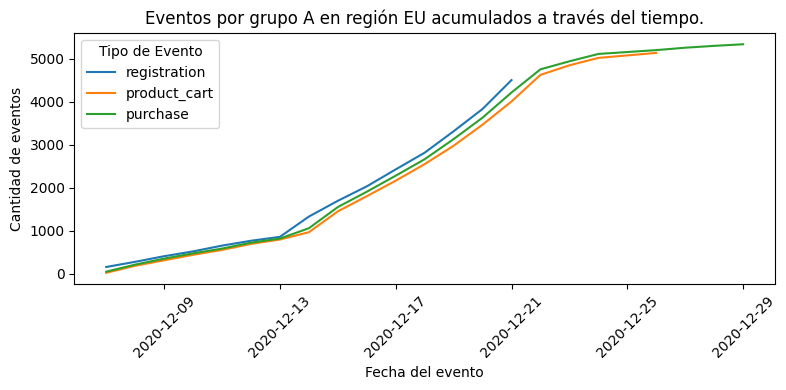

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


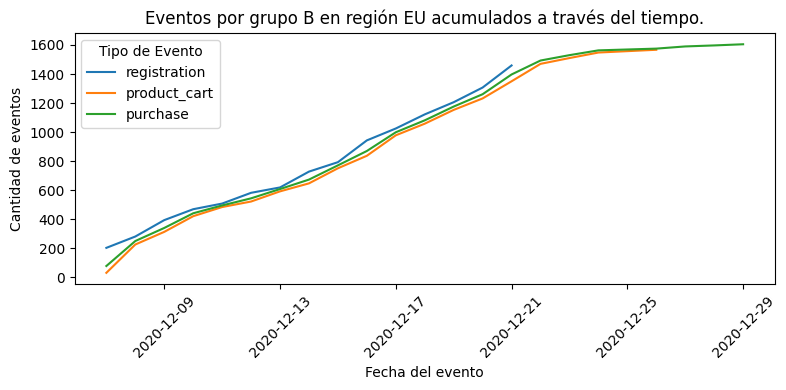

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


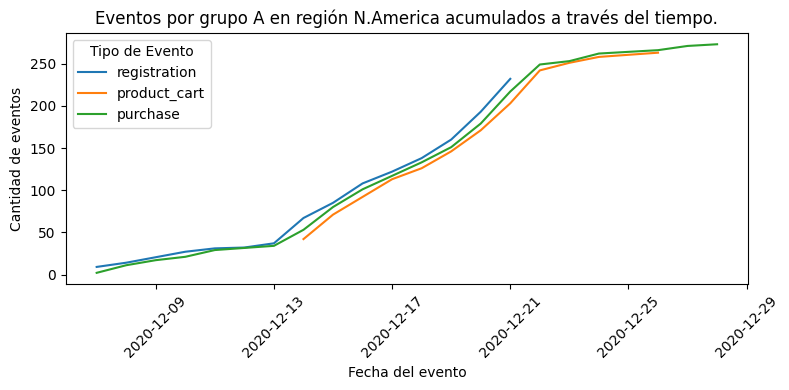

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


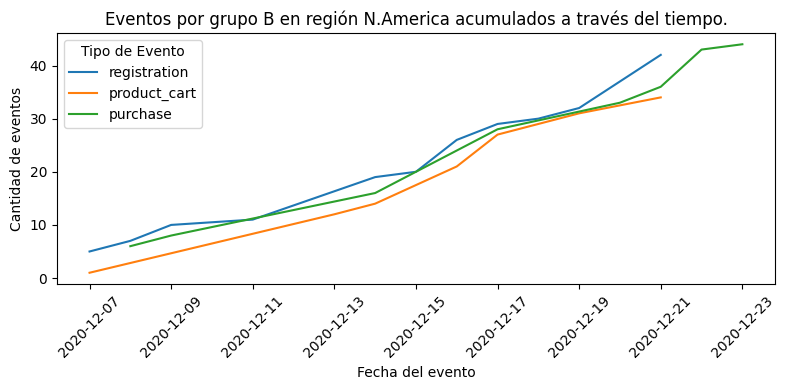

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


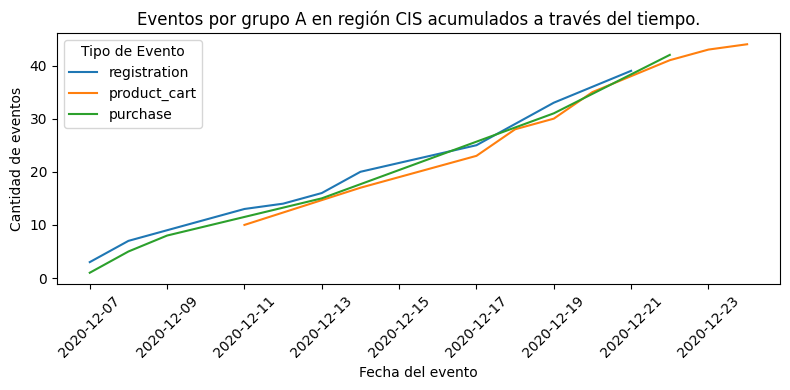

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


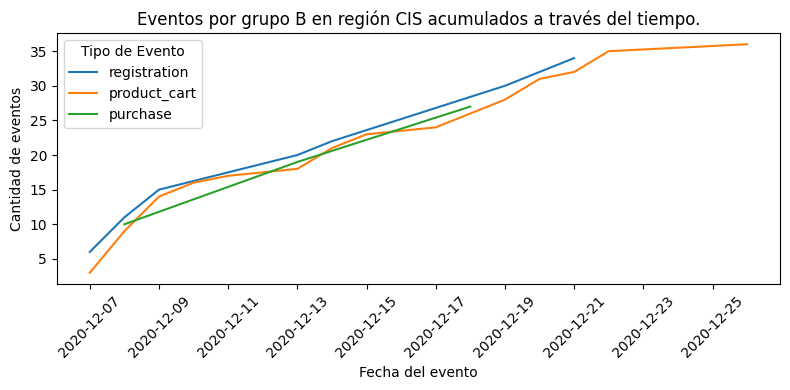

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


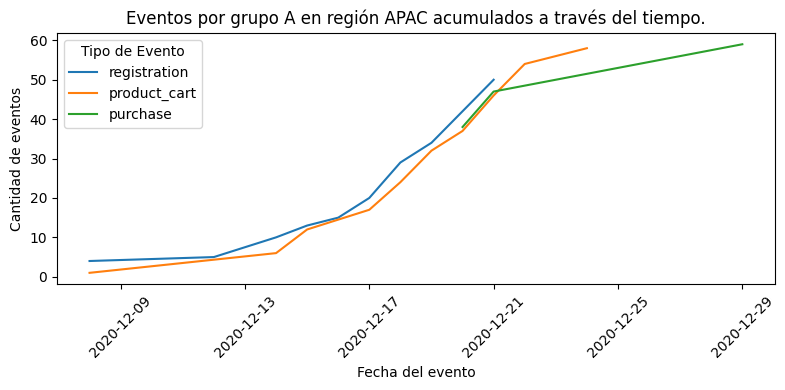

C:\Users\jmrey\AppData\Local\Temp\ipykernel_16056\1251364309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()


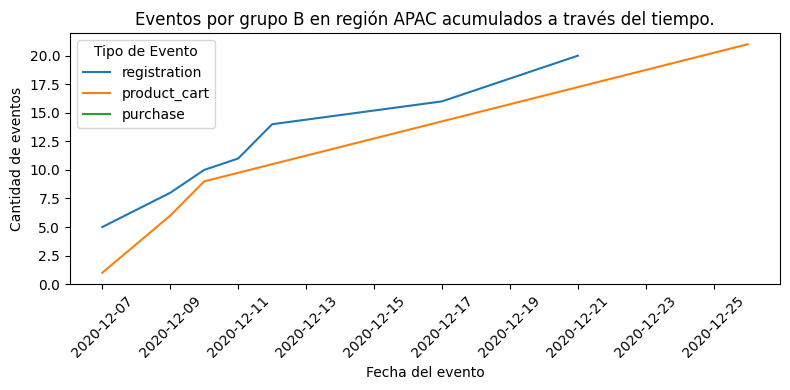

In [60]:
# Ciclamos los datos para graficar por grupo y región:
for reg in regiones:
    datos_reg = df_act_recom_fecha[df_act_recom_fecha['region'] == reg]
    for grupo in grupos:
        datos_grupo = datos_reg[datos_reg['group'] == grupo]
        datos_grupo['usu_acum'] = datos_grupo['user_id'].cumsum()
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=datos_grupo, x="fecha", y="usu_acum",
                     hue="event_name", hue_order=['registration','product_cart','purchase']).set(title=f'Eventos por grupo {grupo} en región {reg} acumulados a través del tiempo.',
                                           xlabel='Fecha del evento', ylabel='Cantidad de eventos')
        plt.xticks(rotation=45)
        plt.legend(title='Tipo de Evento')
        plt.tight_layout()
        plt.show()

En general, vemos que, para casi todas las regiones y grupos, se cumple que, en todo momento hay más usuarios regitrados que realizando otras actividades, sin embargo, como ya se había observado antes, practicamente en todos los casos tenemos que hay más compras que "puestas de producto en carrito".

Podemos ver que el grupo de EU es, por mucho el más grande en cuanto a actividad.

Calculamos ahora la retención de registro a carrito a compra de productos.

In [66]:
# Hacemo un for loop como el usado para graficar para nuestros cálculos:
for reg in regiones:
    datos_reg = df_act_recom_fecha[df_act_recom_fecha['region'] == reg]
    for grupo in grupos:
        datos_grupo = datos_reg[datos_reg['group'] == grupo]
        datos_grupo_agrup = datos_grupo.groupby('event_name').agg({'user_id':'sum'}).reset_index()
        print(f"Región: {reg}, Grupo: {grupo}.")
        ret_reg_carr = datos_grupo_agrup[datos_grupo_agrup['event_name'] == 'product_cart']['user_id'].values[0] / datos_grupo_agrup[datos_grupo_agrup['event_name'] == 'registration']['user_id'].values[0] * 100
        print(f"Porcentaje de usarios registrados que ponen productos en el carrito: {ret_reg_carr:.2f}%")
        if reg == 'APAC' and grupo == 'B': # Lo ponemos ya que ya vimos que en el grupo B de APAC no hubo compras:
            print(f"Porcentaje de usuarios que ponen productos en el carrito y compran: 0.00%")
        else:
            ret_carr_comp = datos_grupo_agrup[datos_grupo_agrup['event_name'] == 'purchase']['user_id'].values[0] / datos_grupo_agrup[datos_grupo_agrup['event_name'] == 'product_cart']['user_id'].values[0] * 100
            print(f"Porcentaje de usuarios que ponen productos en el carrito y compran: {ret_carr_comp:.2f}%")
        print("\n")

Región: EU, Grupo: A.
Porcentaje de usarios registrados que ponen productos en el carrito: 83.65%
Porcentaje de usuarios que ponen productos en el carrito y compran: 109.37%


Región: EU, Grupo: B.
Porcentaje de usarios registrados que ponen productos en el carrito: 70.99%
Porcentaje de usuarios que ponen productos en el carrito y compran: 104.30%


Región: N.America, Grupo: A.
Porcentaje de usarios registrados que ponen productos en el carrito: 75.00%
Porcentaje de usuarios que ponen productos en el carrito y compran: 145.83%


Región: N.America, Grupo: B.
Porcentaje de usarios registrados que ponen productos en el carrito: 34.78%
Porcentaje de usuarios que ponen productos en el carrito y compran: 162.50%


Región: CIS, Grupo: A.
Porcentaje de usarios registrados que ponen productos en el carrito: 94.74%
Porcentaje de usuarios que ponen productos en el carrito y compran: 38.89%


Región: CIS, Grupo: B.
Porcentaje de usarios registrados que ponen productos en el carrito: 200.00%
Porcen

### Prueba Z:

Aplicaremos una prueba Z para validar que la proporción de las poblaciones de los grupos A y B.

Hipótesis nula: Las muestras A y B cuentan con poblaciones proporcionales.

In [53]:
# Establecemos el nivel de significancia estadística alpha:
alpha = 0.05

In [54]:
# Establecemos los valores de eventos totales y compras totales (éxitos) por grupo y calculamos probabilidad (o proporción) de compras para cada uno de los grupos:
eventos_a = df_act_recom_usu[df_act_recom_usu["group"] == "A"]["event_dt"].sum()
compras_a = df_act_recom_usu[df_act_recom_usu["group"] == "A"]["purchase"].sum()

p_a = compras_a / eventos_a

eventos_b = df_act_recom_usu[df_act_recom_usu["group"] == "B"]["event_dt"].sum()
compras_b = df_act_recom_usu[df_act_recom_usu["group"] == "B"]["purchase"].sum()

p_b = compras_b / eventos_b

# Obtenemos la probabilidad combinada:
p_comb = (compras_a + compras_b) / (eventos_a + eventos_b)

# Obtenemos la diferencia:
dif = p_a - p_b

In [55]:
# Calculamos la estadística en desviaciones estándar de la distribución normal estándar:
z_value = dif / mth.sqrt(p_comb * (1 - p_comb) * (1/eventos_a + 1/eventos_b))

# Establecemos la distribución normal estándar (media 0, desviación estándar 1):
distr = st.norm(0, 1)

In [56]:
# Calculamos el p valor:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

# Probamos la hipótesis nula:
if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.2738717354359772
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


Como se mencionó antes, ahora separamos a los usuarios para analizar solo a los de las regiones de NA y EU (quienes fueron los más grandes compradores) y probaremos la hipótesis nula.

In [57]:
# Creamos los DF con las regiones filtradas:
regiones_a_revisar = ["NA","EU"]

# Establecemos los valores de eventos totales y compras totales (éxitos) por grupo y calculamos probabilidad (o proporción) de compras para cada uno de los grupos:
eventos_a_reg = df_act_recom_usu[
    (df_act_recom_usu["group"] == "A") & (df_act_recom_usu["region"].isin(regiones_a_revisar))
    ]["event_dt"].sum()
compras_a_reg = df_act_recom_usu[
    (df_act_recom_usu["group"] == "A") & (df_act_recom_usu["region"].isin(regiones_a_revisar))
    ]["purchase"].sum()

p_a_reg = compras_a_reg / eventos_a_reg

eventos_b_reg = df_act_recom_usu[
    (df_act_recom_usu["group"] == "B") & (df_act_recom_usu["region"].isin(regiones_a_revisar))
    ]["event_dt"].sum()
compras_b_reg = df_act_recom_usu[
    (df_act_recom_usu["group"] == "B") & (df_act_recom_usu["region"].isin(regiones_a_revisar))
    ]["purchase"].sum()

p_b_reg = compras_b_reg / eventos_b_reg

# Obtenemos la probabilidad combinada:
p_comb_reg = (compras_a_reg + compras_b_reg) / (eventos_a_reg + eventos_b_reg)

# Obtenemos la diferencia:
dif_reg = p_a_reg - p_b_reg

In [58]:
# Calculamos la estadística en desviaciones estándar de la distribución normal estándar:
z_value_reg = dif_reg / mth.sqrt(p_comb_reg * (1 - p_comb_reg) * (1/eventos_a_reg + 1/eventos_b_reg))

In [59]:
# Calculamos el p valor:
p_value_reg = (1 - distr.cdf(abs(z_value_reg))) * 2

print('p-value: ', p_value_reg)

# Probamos la hipótesis nula:
if (p_value_reg < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.5180237966764523
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, aplicar pruebas estadísticas sobre la conversión de cada evento ayuda a entender mejor en que etápa se ve más alterada la experiencia de los usuarios
</div>

## Conclusiones.

A pesar de que durante las fechas del estudio se tuvo una amplia participación de usuarios dentro de la web de la tienda, la cantidad de usuarios y la forma en que se agruparon en las muestras A y B para la prueba de un nuevo "recomendador de productos" (recommender) no fue óptima pues solo contamos con cerca de 2800 usuarios de los más de 58 mil que estuvieron activos.

El haber realizado la prueba en el marco de las promociones Navideñas de las regiones de Norte América y Europa pudo haber tenido un impacto importante sobre el comportamiento de los usuarios, por lo que es un factor que no podremos desestimar si se toman decisiones en torno a la prueba, esto está visibilizado en los gráficos de ventas promedio.

En general se considera que los datos no son suficientes y que la prueba no se efectuó en condiciones óptimas.